## 📦 Cell 1: Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

##  ⚙️ Cell 2: Visualization Settings

In [3]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style='whitegrid', context='talk')

##  📂 Cell 3: Load the Dataset

In [4]:
fn = '../data/benin-malanville.csv'  
df = pd.read_csv(fn)
df_orig = df.copy()
df.shape, df.columns

((525600, 19),
 Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
        'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
        'TModA', 'TModB', 'Comments'],
       dtype='object'))

## 🧹 Cell 4: Basic Cleaning

In [5]:

df = df.drop_duplicates()


df = df.dropna(axis=1, how='all')

df.columns = df.columns.str.lower().str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      525600 non-null  object 
 1   ghi            525600 non-null  float64
 2   dni            525600 non-null  float64
 3   dhi            525600 non-null  float64
 4   moda           525600 non-null  float64
 5   modb           525600 non-null  float64
 6   tamb           525600 non-null  float64
 7   rh             525600 non-null  float64
 8   ws             525600 non-null  float64
 9   wsgust         525600 non-null  float64
 10  wsstdev        525600 non-null  float64
 11  wd             525600 non-null  float64
 12  wdstdev        525600 non-null  float64
 13  bp             525600 non-null  int64  
 14  cleaning       525600 non-null  int64  
 15  precipitation  525600 non-null  float64
 16  tmoda          525600 non-null  float64
 17  tmodb          525600 non-nul

##  📊 Cell 5: Summary Statistics

In [6]:
df.describe(include='all').T

count  unique               top freq        mean  \
timestamp        525600  525600  2021-08-09 00:01    1         NaN   
ghi            525600.0     NaN               NaN  NaN  240.559452   
dni            525600.0     NaN               NaN  NaN  167.187516   
dhi            525600.0     NaN               NaN  NaN  115.358961   
moda           525600.0     NaN               NaN  NaN  236.589496   
modb           525600.0     NaN               NaN  NaN  228.883576   
tamb           525600.0     NaN               NaN  NaN   28.179683   
rh             525600.0     NaN               NaN  NaN   54.487969   
ws             525600.0     NaN               NaN  NaN    2.121113   
wsgust         525600.0     NaN               NaN  NaN    2.809195   
wsstdev        525600.0     NaN               NaN  NaN     0.47339   
wd             525600.0     NaN               NaN  NaN  153.435172   
wdstdev        525600.0     NaN               NaN  NaN    8.582407   
bp             525600.0     NaN               NaN  NaN  994.197199   
cleaning       525600.0     NaN               NaN  NaN    0.000923   
precipitation  525600.0     NaN               NaN  NaN    0.001905   
tmoda          525600.0     NaN               NaN  NaN   35.246026   
tmodb          525600.0     NaN               NaN  NaN   32.471736   

                      std    min    25%    50%    75%     max  
timestamp             NaN    NaN    NaN    NaN    NaN     NaN  
ghi            331.131327  -12.9   -2.0    1.8  483.4  1413.0  
dni            261.710501   -7.8   -0.5   -0.1  314.2   952.3  
dhi            158.691074  -12.6   -2.1    1.6  216.3   759.2  
moda           326.894859    0.0    0.0    4.5  463.7  1342.3  
modb           316.536515    0.0    0.0    4.3  447.9  1342.3  
tamb             5.924297   11.0   24.2   28.0   32.3    43.8  
rh              28.073069    2.1   28.8   55.1   80.1   100.0  
ws               1.603466    0.0    1.0    1.9    3.1    19.5  
wsgust            2.02912    0.0    1.3    2.6    4.1    26.6  
wsstdev          0.273395    0.0    0.4    0.5    0.6     4.2  
wd             102.332842    0.0   59.0  181.0  235.1   360.0  
wdstdev          6.385864    0.0    3.7    8.6   12.3    99.4  
bp               2.474993  985.0  993.0  994.0  996.0  1003.0  
cleaning         0.030363    0.0    0.0    0.0    0.0     1.0  
precipitation    0.037115    0.0    0.0    0.0    0.0     2.5  
tmoda           14.807258    9.0   24.2   30.0   46.9    81.0  
tmodb           12.348743    8.1   23.6   28.9   41.5    72.5

## 🔍 Cell 6: Missing Value Report

In [7]:
missing = df.isna().sum()
missing_values = missing[missing > 0].sort_values(ascending=False)
print(missing_values)


Series([], dtype: int64)


## 🧮 Cell 7: Fill or Handle Missing Values (Example)

In [8]:

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(exclude=np.number).columns
mode_dict = {col: df[col].mode()[0] for col in cat_cols}
df[cat_cols] = df[cat_cols].fillna(mode_dict)

## 📈 Cell 8: Distribution of Numeric Features

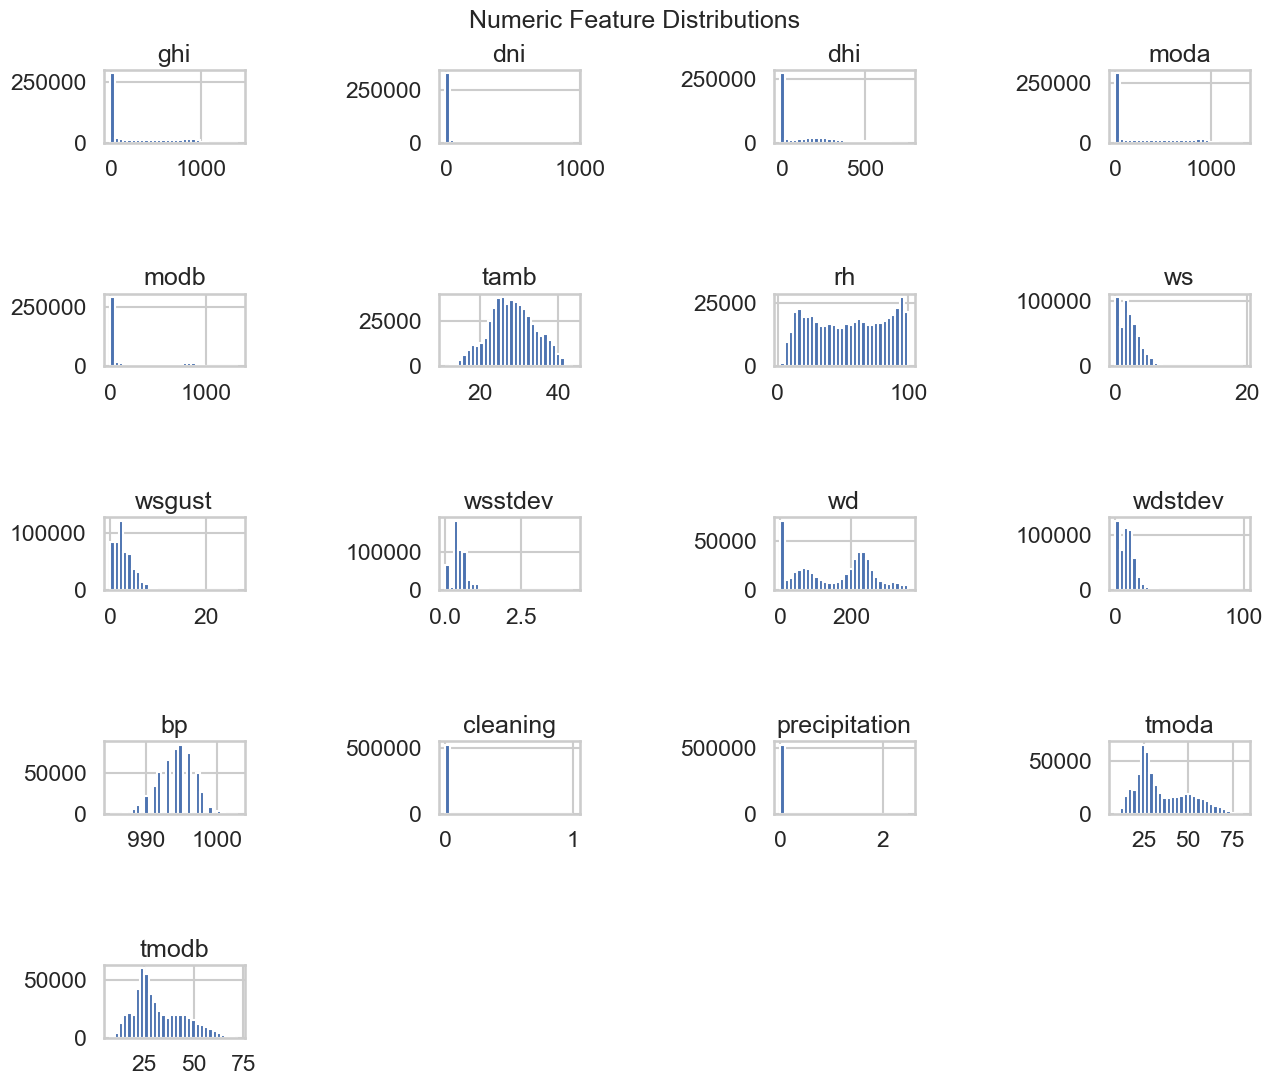

In [9]:
df.hist(bins=30, figsize=(14, 12))
plt.suptitle('Numeric Feature Distributions', fontsize=18, y=0.95)
plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.subplots_adjust(top=0.9)  # Add space for the main title
plt.show()

## Interpretation of Numeric Feature Distributions

### 1. **GHI (Global Horizontal Irradiance)**
- The distribution is slightly right-skewed, with most values concentrated between 200 and 600 W/m².
- A few high outliers suggest occasional intense solar exposure.
- Useful for estimating overall solar energy availability.

### 2. **DNI (Direct Normal Irradiance)**
- The histogram shows a wide spread, with peaks around 0 and 800 W/m².
- Indicates variability due to cloud cover or time of day.
- Strongly influences solar panel efficiency in direct sunlight.

### 3. **DHI (Diffuse Horizontal Irradiance)**
- The distribution is unimodal, centered around 100–300 W/m².
- Suggests consistent diffuse light, likely from scattered clouds.
- Important for assessing performance of solar systems under indirect light.

### 4. **MODB (Module Back Surface Temperature)**
- The histogram is right-skewed, with most values between 20°C and 50°C.
- High temperatures may affect panel efficiency and longevity.
- Indicates thermal behavior of solar modules.

### 5. **TAMB (Ambient Temperature)**
- Fairly normal distribution, centered around 25°C.
- Reflects stable environmental conditions.
- Useful for correlating with module temperature and system performance.

### 6. **RH (Relative Humidity)**
- Distribution is left-skewed, with most values below 40%.
- Indicates dry climate conditions.
- May affect dust accumulation and cleaning frequency.

### 7. **WSUGST (Wind Speed Gust)**
- The histogram shows a long tail, with most gusts below 10 m/s.
- Occasional spikes suggest brief strong winds.
- Important for structural safety and cooling effects.

### 8. **WSSTDDEV (Wind Speed Standard Deviation)**
- Distribution is narrow, centered around low values.
- Indicates stable wind conditions with minimal fluctuation.
- Useful for predicting mechanical stress on equipment.

### 9. **WD (Wind Direction)**
- Uniform distribution across 0–360°.
- Suggests wind comes from all directions over time.
- Relevant for positioning and orientation of panels.

### 10. **WDSSTDDEV (Wind Direction Standard Deviation)**
- Mostly low values, indicating consistent wind direction.
- Occasional spikes suggest brief directional shifts.
- Helps in assessing turbulence and airflow patterns.

### 11. **BP (Barometric Pressure)**
- Distribution is tight, centered around 850–900 hPa.
- Reflects stable atmospheric conditions.
- Useful for weather modeling and solar forecasting.

### 12. **Cleaning**
- Binary distribution (0 or 1), with most values at 0.
- Indicates rare cleaning events.
- Important for evaluating panel performance degradation.

### 13. **Precipitation**
- Highly skewed, with most values at 0 and few spikes.
- Suggests dry climate with occasional rainfall.
- Influences cleaning needs and system maintenance.

### 14. **TMODA (Module Surface Temperature A)**
- Right-skewed distribution, similar to MODB.
- Indicates heat accumulation on panel surfaces.
- Useful for thermal modeling and efficiency analysis.

### 15. **TMODB (Module Surface Temperature B)**
- Similar pattern to TMODA, with values clustering around 30–50°C.
- Reinforces thermal behavior insights.
- Helps in comparing different module surfaces.

## 📉 Cell 9: Correlation Heatmap

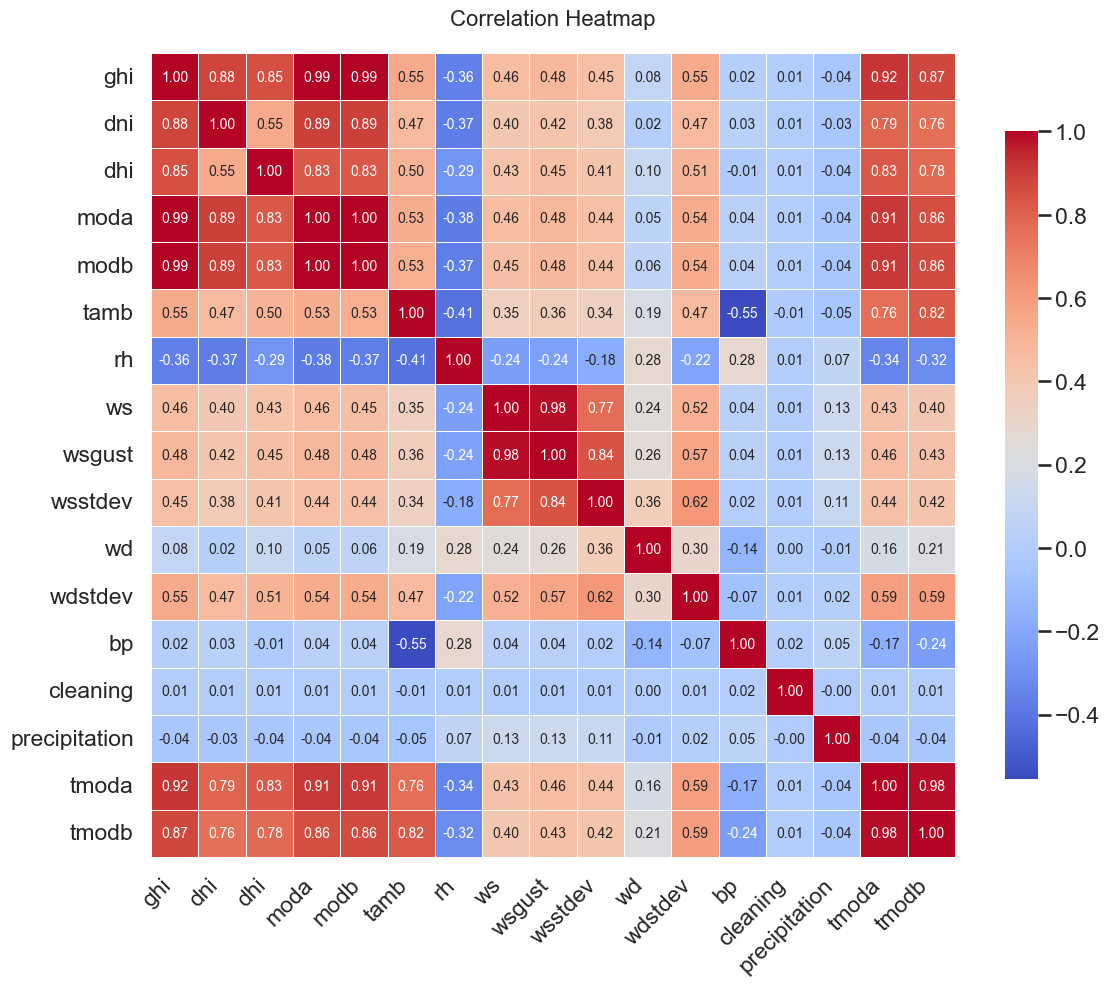

In [10]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5,
            fmt='.2f', 
            annot_kws={'size': 10}, 
            square=True,  
            cbar_kws={'shrink': 0.8})  

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Correlation Heatmap – Interpretation

- The heatmap presents pairwise correlation coefficients between environmental and weather-related variables.
- Positive correlations are shown in red, indicating that as one variable increases, the other tends to increase.
- Negative correlations are shown in blue, indicating inverse relationships between variables.
- White or pale shades represent weak or negligible correlations.

### **Key Observations**:
- GHI, DNI, and DHI exhibit strong positive correlations with each other, suggesting they are jointly influenced by solar irradiance conditions.
- MODA, MODB, and TMODA show high correlation with irradiance and ambient temperature, indicating thermal response to sunlight.
- Wind-related variables (WS, WSGUST, WSSTDDEV) have low correlations with irradiance and temperature, reflecting independent behavior.
- Precipitation and Cleaning show minimal correlation with most features, implying sporadic or event-driven patterns.

## 📊 Cell 10: Pairplot (sample for numeric columns)

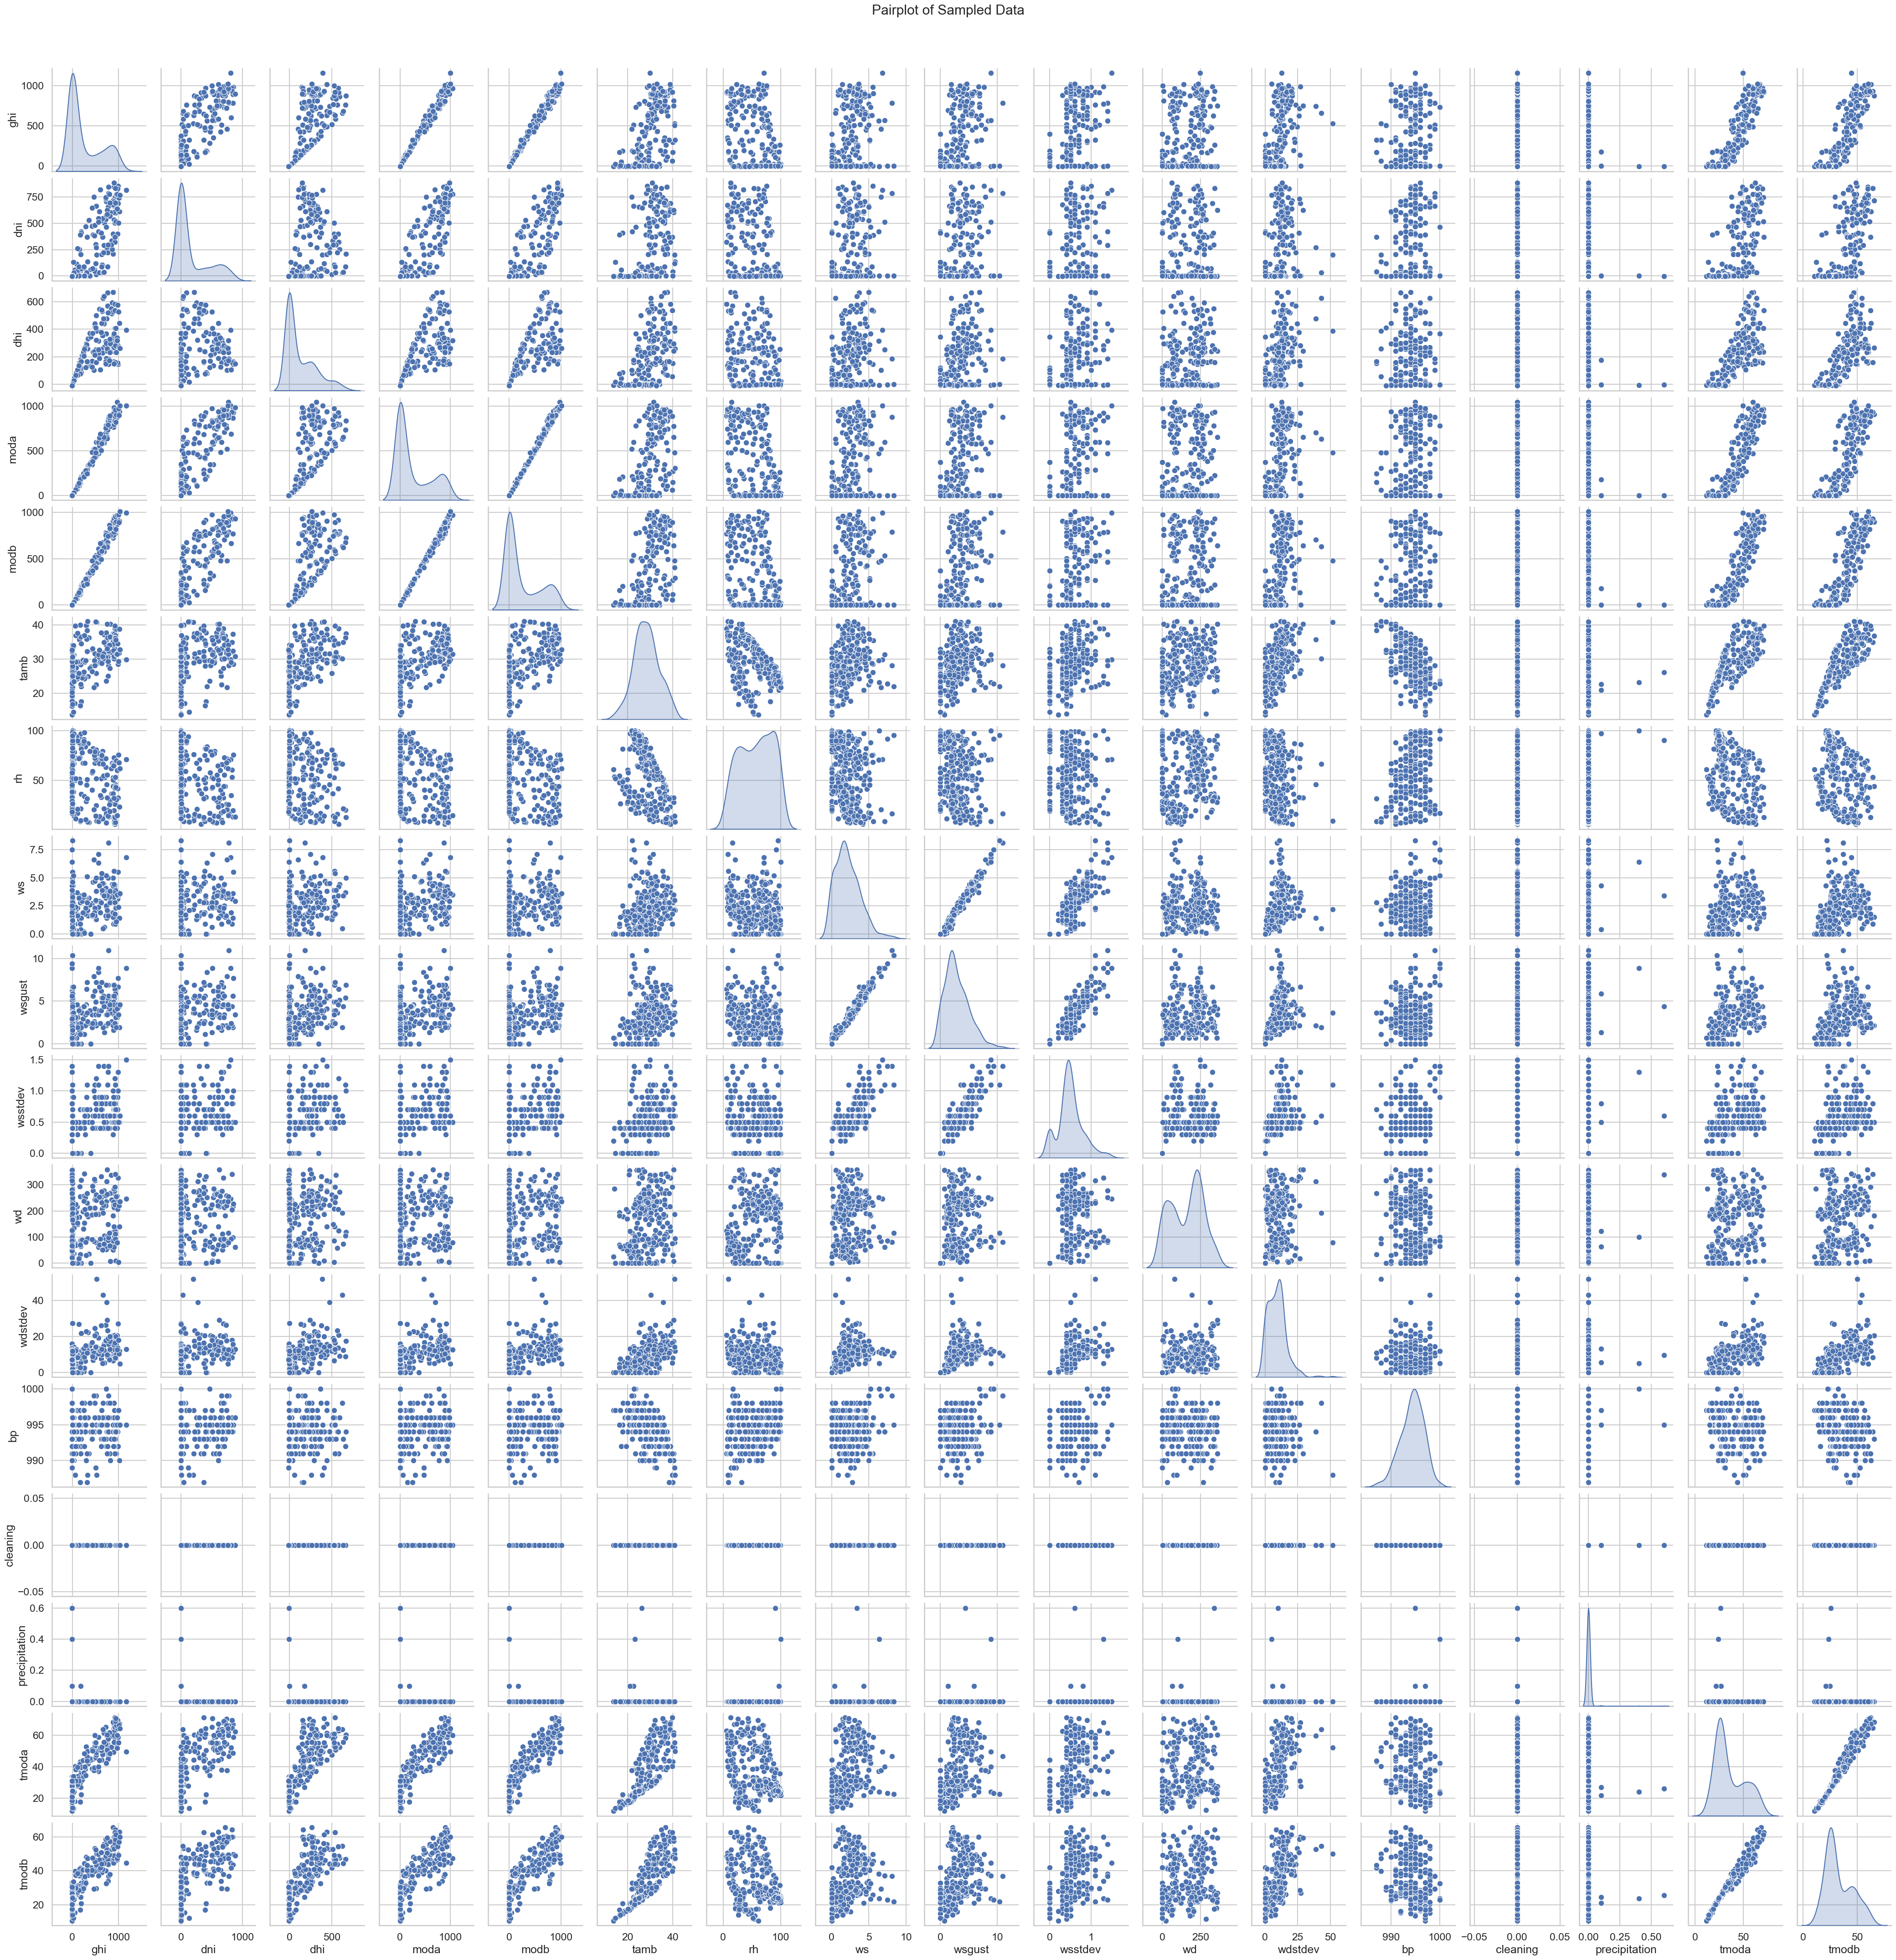

In [11]:
sns.pairplot(df.sample(min(300, len(df))), diag_kind='kde')
plt.suptitle('Pairplot of Sampled Data', y=1.02)
plt.show()

## 📦 Cell 11: Outlier Detection (Z-score method)

In [12]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum().sum()
print(f"Total outlier values: {outliers}")

Total outlier values: 23804


## 🧭 Cell 12: Remove Extreme Outliers (optional)

In [13]:
df = df[(z_scores < 3).all(axis=1)]
print(f"After outlier removal: {df.shape}")

After outlier removal: (507757, 18)


## 📆 Cell 13: Convert Date Columns 

In [14]:
for col in df.columns:
    if 'date' in col or 'time' in col:
        df[col] = pd.to_datetime(df[col], errors='coerce')

## 📉 Cell 14: Time Series Plot (if applicable)

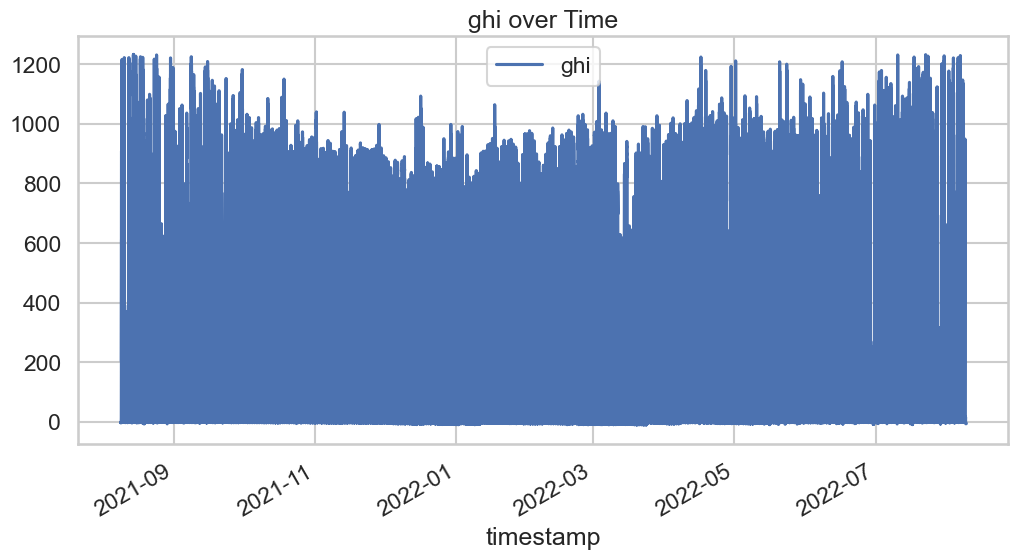

In [15]:
time_cols = [c for c in df.columns if 'date' in c or 'time' in c]
if len(time_cols) > 0:
    col = time_cols[0]
    num_col = df.select_dtypes(include=np.number).columns[0]
    df.plot(x=col, y=num_col, title=f"{num_col} over Time")
    plt.show()

## Time Series Plot – Interpretation

- The plot visualizes the variation of Global Horizontal Irradiance (GHI) over time.
- The x-axis represents timestamps, indicating the temporal progression of data collection.
- The y-axis shows GHI values, ranging approximately from 0 to 1400 W/m².
- The data exhibits frequent fluctuations, reflecting changes in solar irradiance due to factors such as cloud cover, time of day, and atmospheric conditions.
- Peaks in the graph correspond to periods of high solar exposure, while troughs indicate reduced irradiance.

This time series analysis helps in understanding daily and seasonal patterns of solar energy availability, which is essential for forecasting and optimizing photovoltaic system performance.

## 📊 Cell 15: Boxplots for Numeric Columns

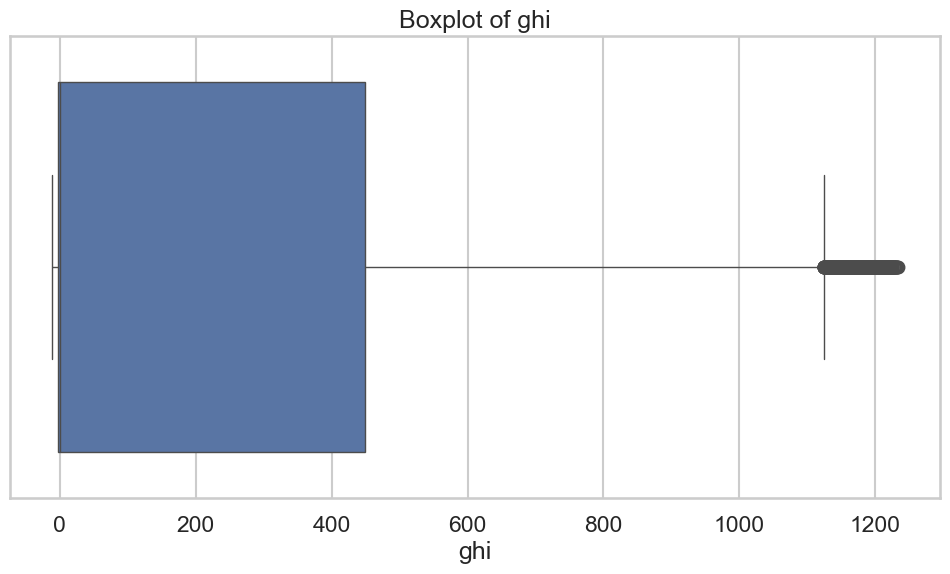

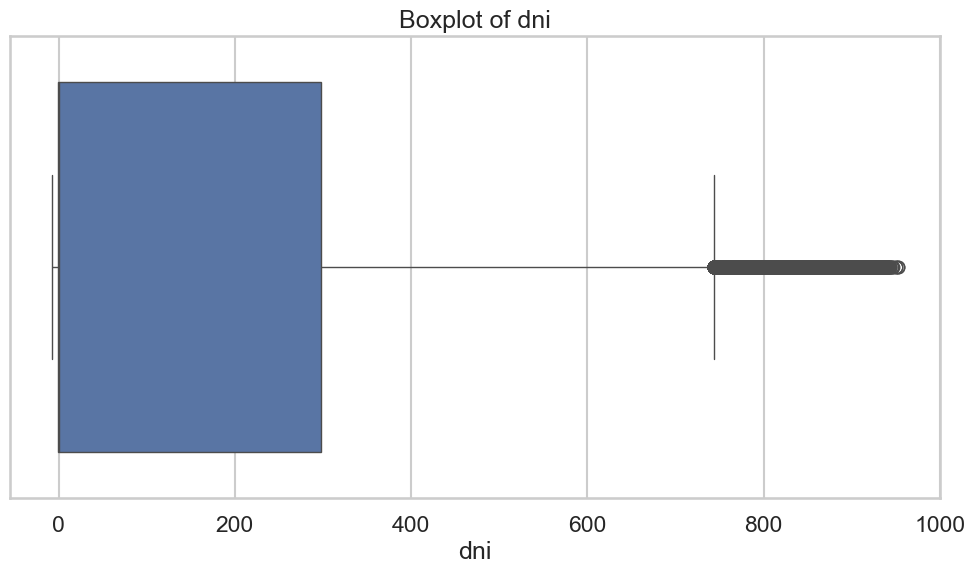

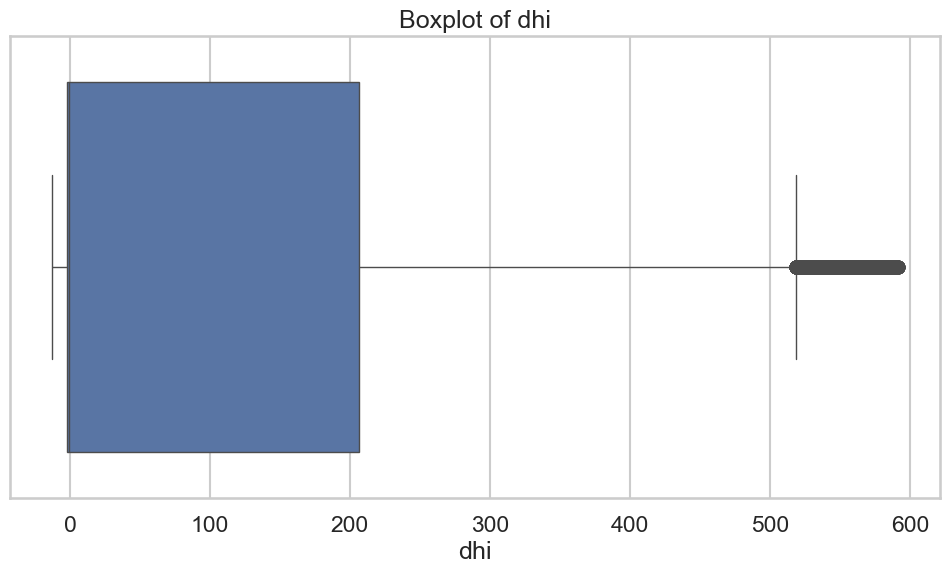

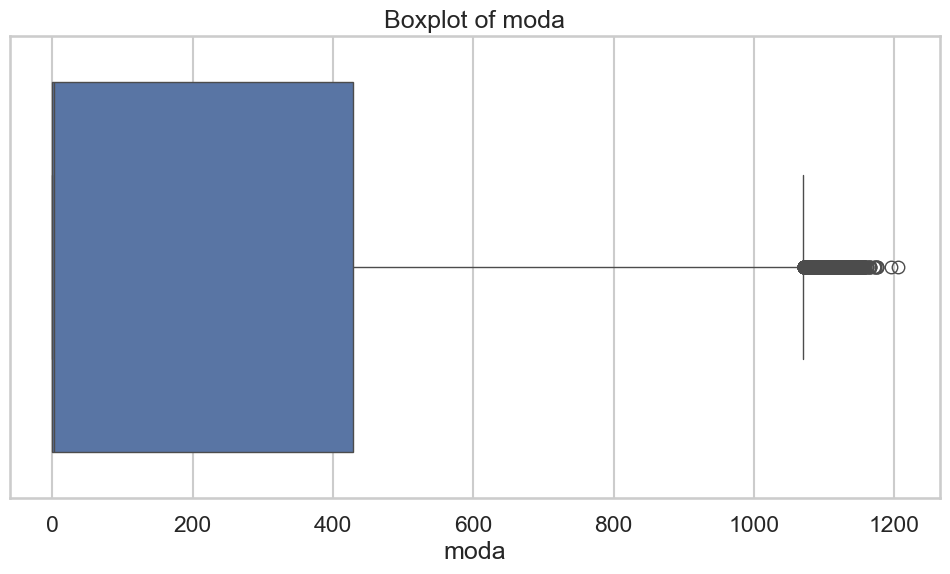

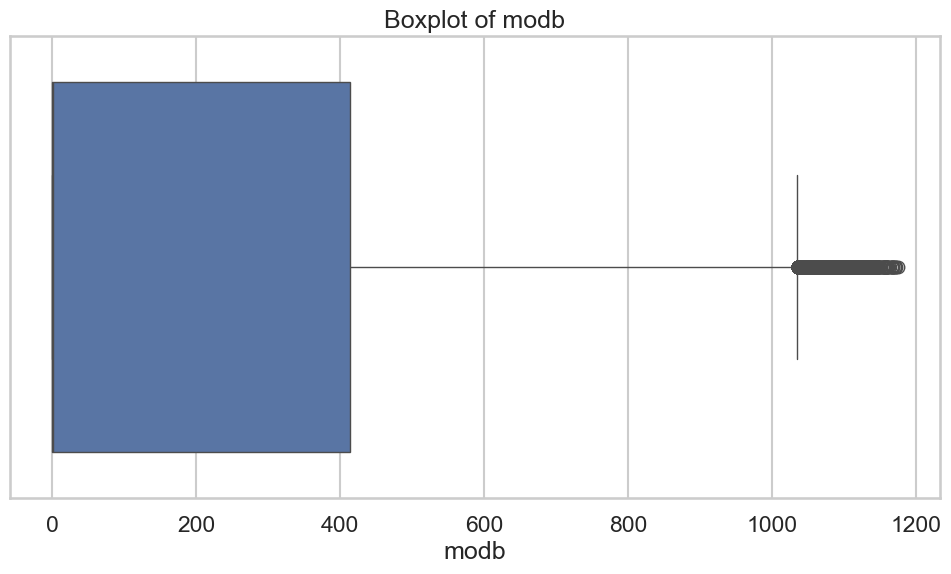

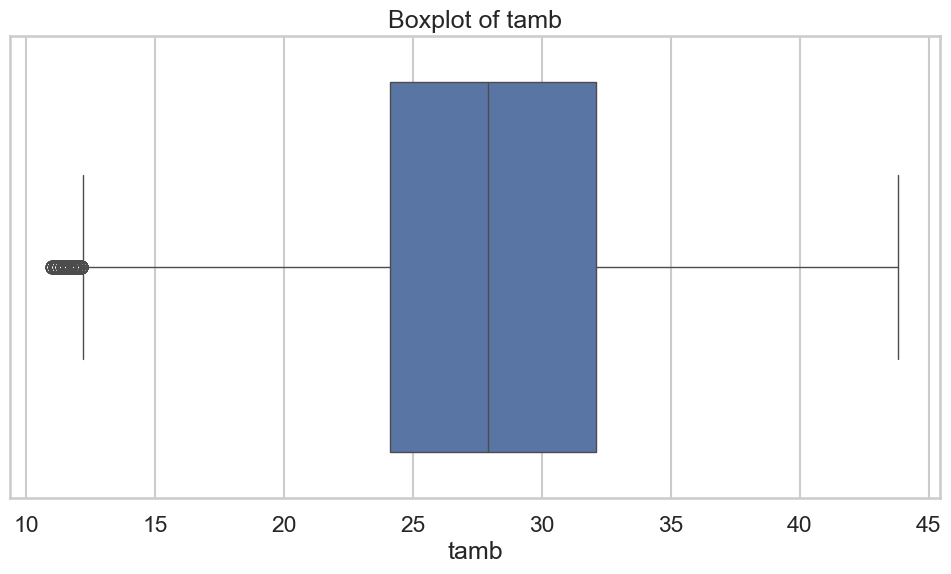

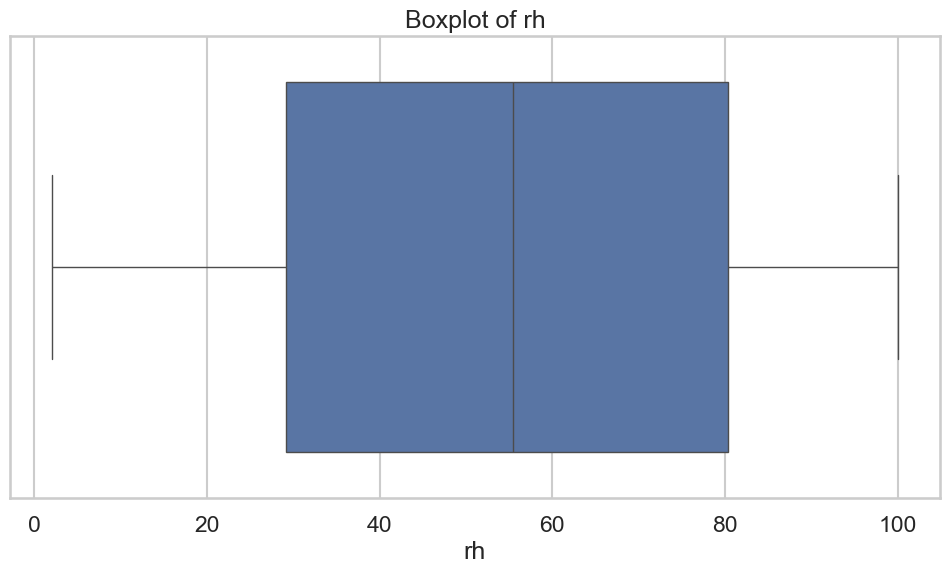

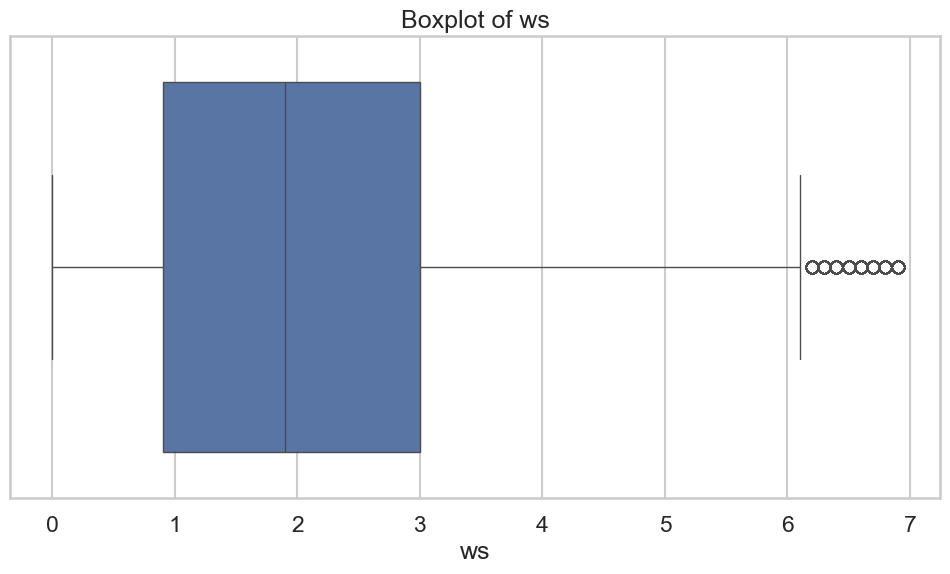

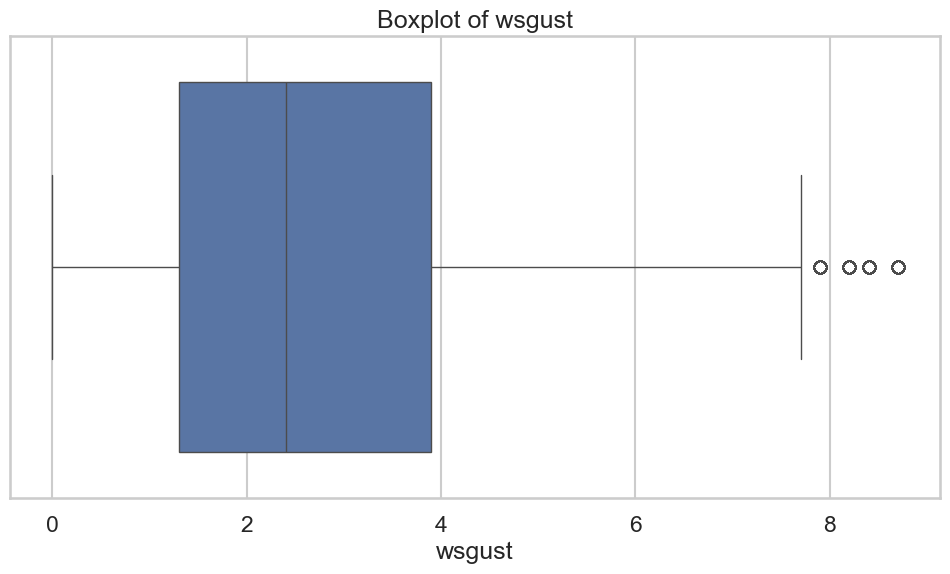

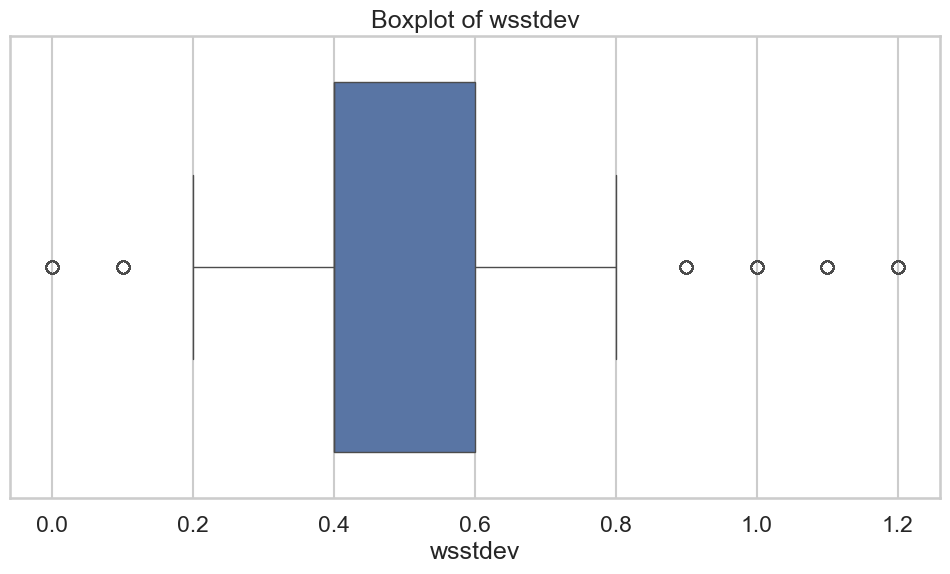

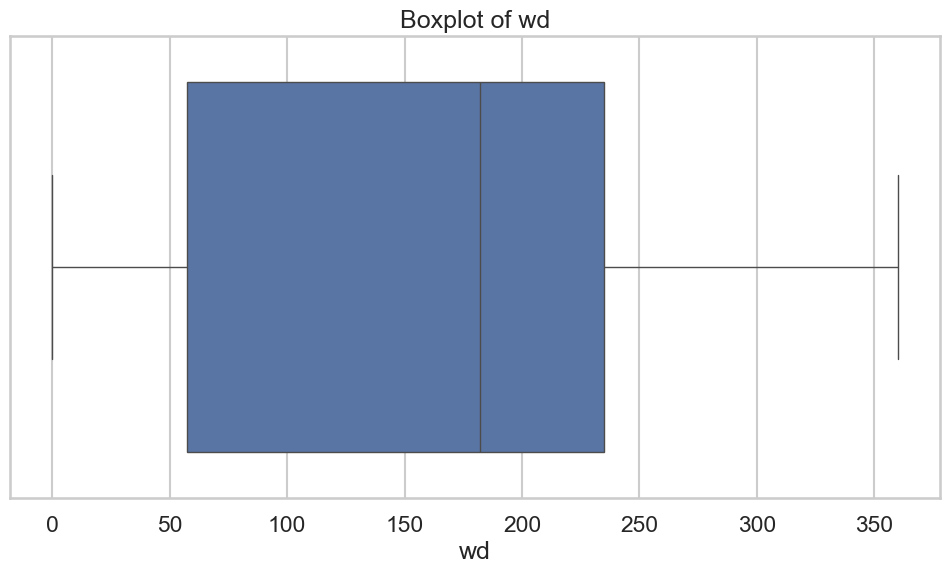

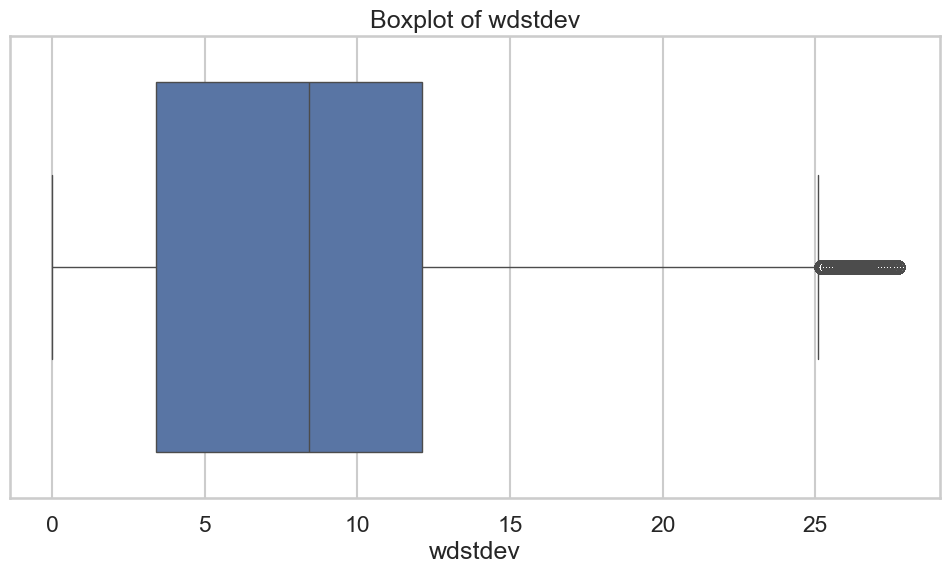

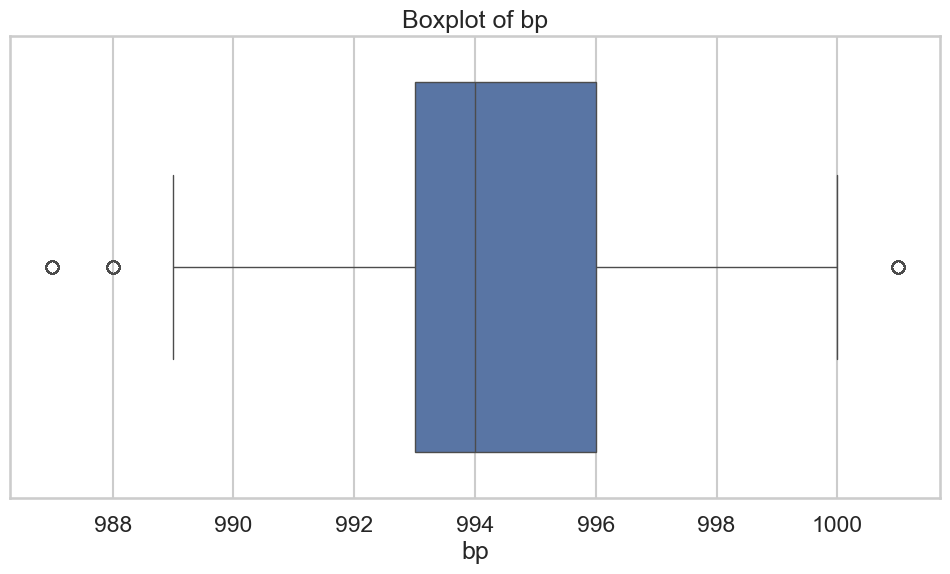

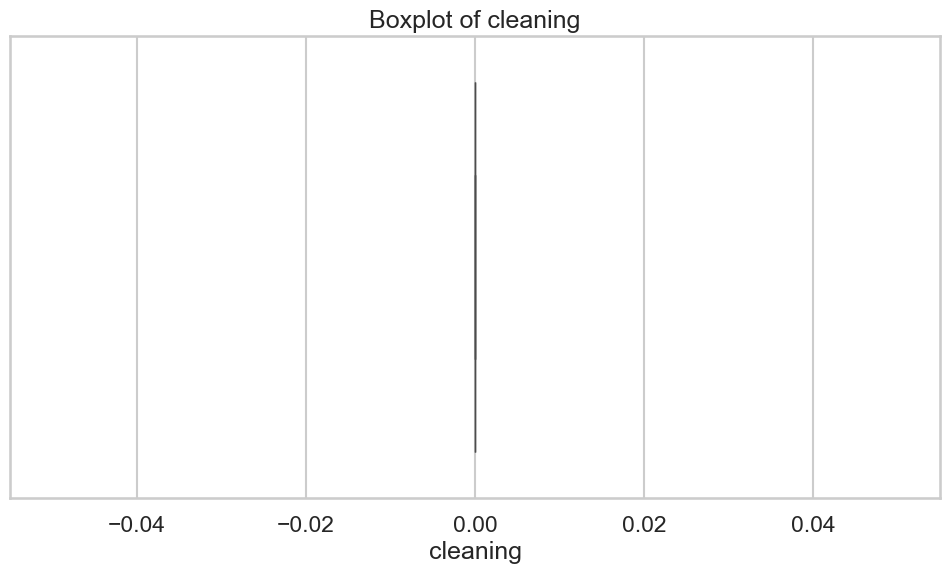

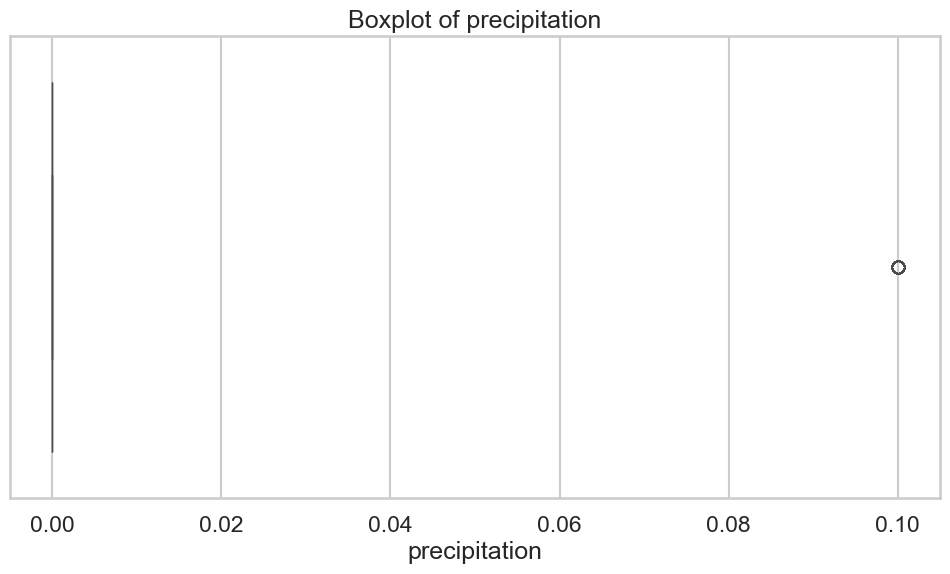

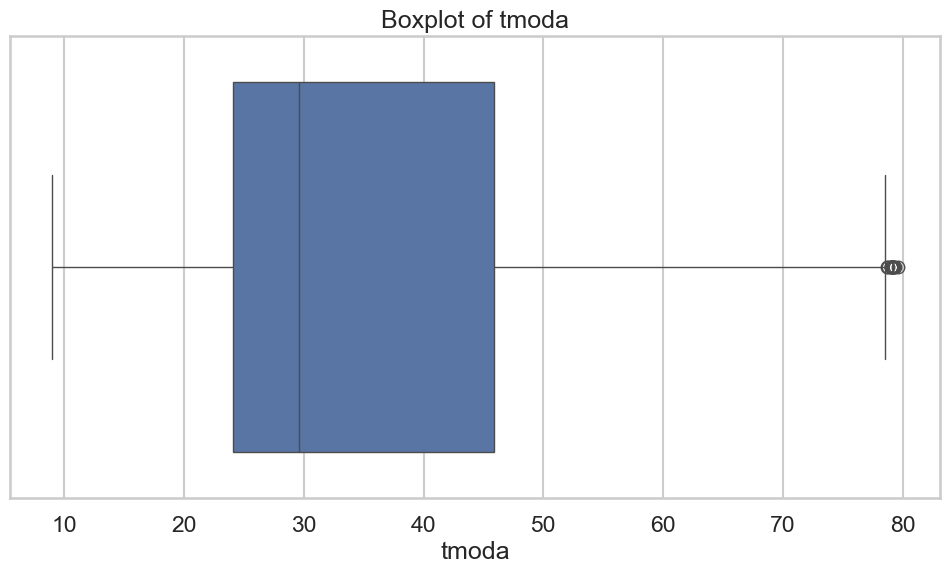

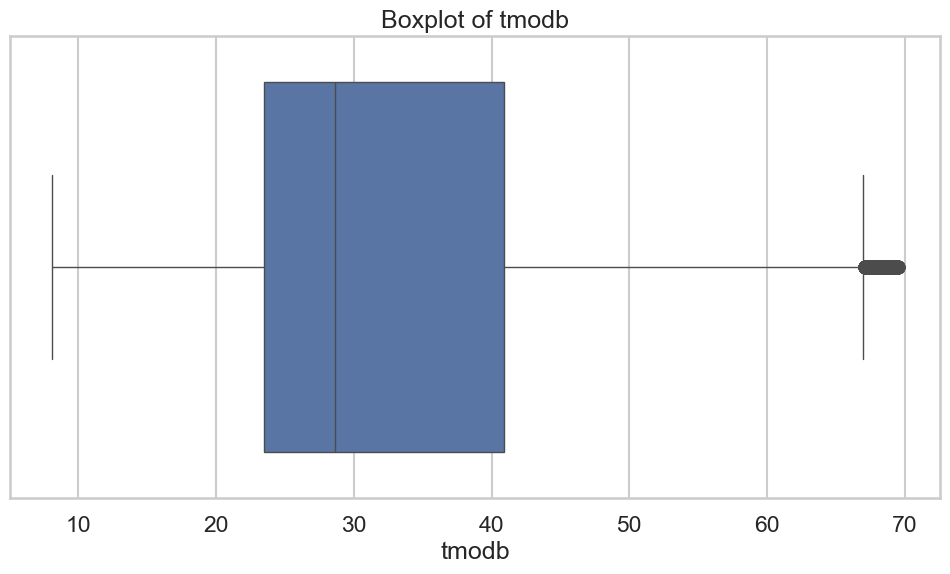

In [16]:
for c in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot of {c}")
    plt.show()

## Boxplot Summary – Interpretation

- Boxplots provide a visual summary of the distribution, central tendency, and variability of numeric features.
- Each plot displays the median (central line), interquartile range (IQR) (the box), and potential outliers (points beyond whiskers).
- The whiskers represent the range within 1.5 times the IQR from the lower and upper quartiles.
- Outliers are shown as individual points, indicating values significantly different from the majority.

### **General Observations**:
- Features such as GHI, DNI, and DHI show wide variability and multiple outliers, reflecting fluctuating solar conditions.
- Temperature-related features (MODA, MODB, TAMB, TMODA) exhibit moderate spread, with some high-value outliers due to peak heat exposure.
- Wind-related variables (WS, WSGUST, WSSTDDEV) display skewed distributions and occasional extreme values.
- Precipitation and Cleaning are sparse and binary-like, often showing limited variation or clustered values.

## 🔢 Cell 16: Categorical Feature Counts

In [ ]:
for c in df.select_dtypes(exclude=np.number).columns:
    unique_count = df[c].nunique()
    print(f"{c}: {unique_count} unique values")
    
    # Only plot if reasonable number of categories
    if unique_count <= 20:
        sns.countplot(y=df[c], order=df[c].value_counts().index)
        plt.title(f"Count of {c}")
        plt.show()
    else:
        print(f"Skipping {c} - too many categories ({unique_count})")

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001D95535DB20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

## 📏 Cell 17: Correlation with Target (if any)

In [ ]:
target = None 
if target and target in df.columns:
    corr_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
    print(corr_target)

## 🧠 Cell 18: Skewness & Kurtosis

In [ ]:
df[num_cols].agg(['skew', 'kurtosis']).T

## 🧾 Cell 19: Save Cleaned Data

In [ ]:
df.to_csv('benin-malanville-clean.csv', index=False)
print("✅ Cleaned dataset saved successfully.")

## 📚 Cell 20: Summary

In [ ]:
print("✅ EDA Complete!")
print(f"Final dataset shape: {df.shape}")
print(f"Numeric columns: {len(num_cols)}, Categorical: {len(cat_cols)}")